In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import missingno as msno
import seaborn as sns 

In [3]:
import numpy as np

In [4]:
df= pd.read_csv("2017.csv")  #reading the world happiness report

In [5]:
cols= ['Country','Happiness.Rank','Happiness.Score'] #taking out the name of the country,rank and score

In [6]:
df = df[cols] #creating new dataframe for the three columns
df.head(2)

,Country,Happiness.Rank,Happiness.Score
0,Norway,1,7.537
1,Denmark,2,7.522


In [7]:
df_world = pd.read_csv("countries of the world.csv") #reading additional information regarding countries from the world bank report
df_world.head(2)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"


In [8]:
#droping some columns out
df_world= df_world.drop(columns=['Arable (%)','Crops (%)','Other (%)'])

In [9]:
#Although the country names in the dataframes is written in identical ways, some of the as "space" gap
# I am using the str.strip() function to close space gaps either bofore or after the counntyr name
df_world['Country'] = df_world['Country'].str.strip()
df['Country']=df['Country'].str.strip()

In [10]:
#merging the two dataframe based on the country name
df_happy = df.merge(df_world,on=['Country'], how='inner')
df_happy.head(2)

,Country,Happiness.Rank,Happiness.Score,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Norway,1,7.537,WESTERN EUROPE,4610820,323802,"14,2","7,77","1,74","3,7",37800.0,"100,0","461,7",3,"11,46","9,4","0,021","0,415","0,564"
1,Denmark,2,7.522,WESTERN EUROPE,5450661,43094,"126,5","16,97","2,48","4,56",31100.0,"100,0","614,6",3,"11,13","10,36","0,018","0,246","0,735"


In [11]:
#replacing ',' in '.' and changinf strings into floats
cols= df_happy.columns
for col in cols:
    try: 
        df_happy[col]= df_happy[col].str.replace(',','.')
        df_happy[col]= df_happy[col].astype(float)
    except:
        pass

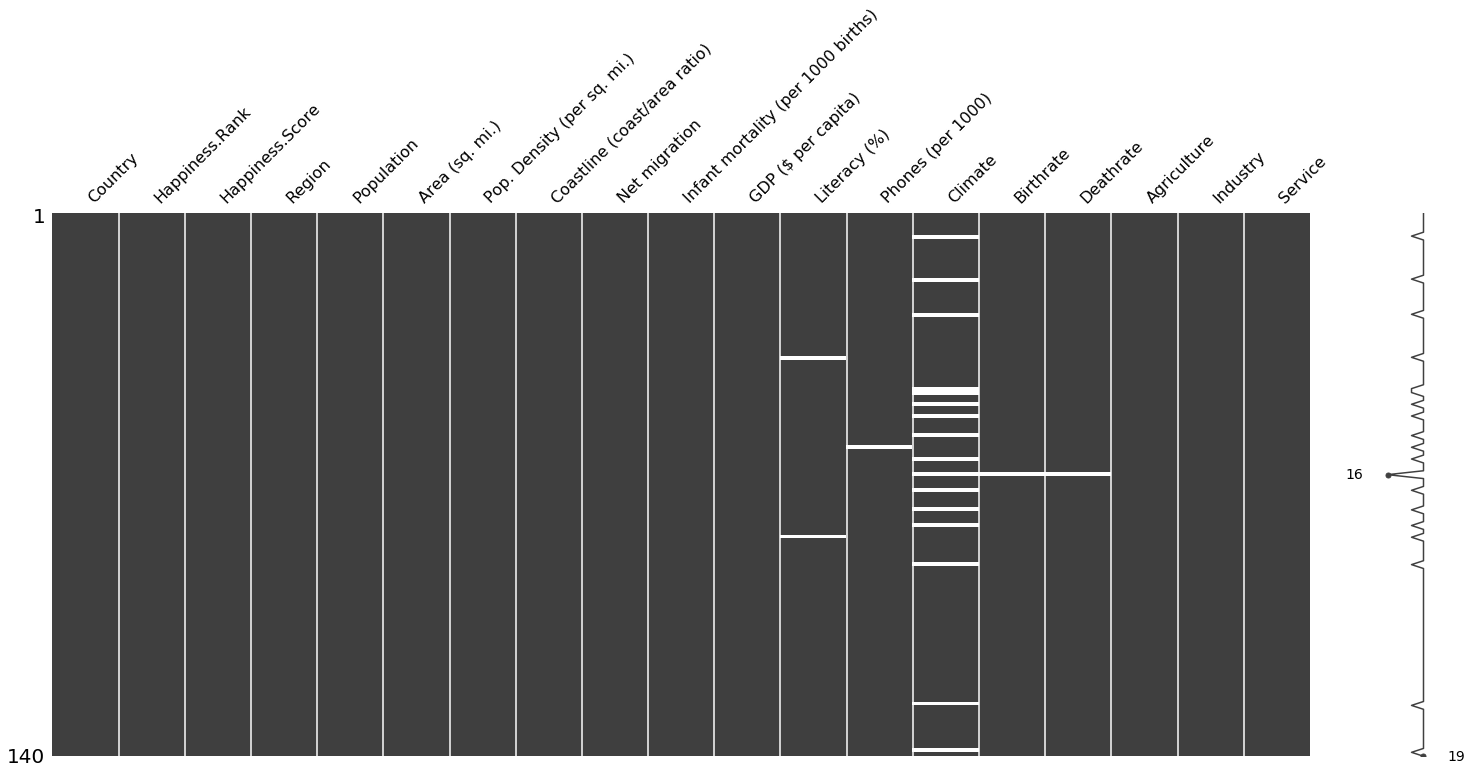

In [12]:
#checing visually to null values
%matplotlib inline
msno.matrix(df_happy)

In [13]:
df_happy[df_happy['Literacy (%)'].isnull()] #checking details of null values

,Country,Happiness.Rank,Happiness.Score,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
37,Slovakia,40,6.098,EASTERN EUROPE,5439448,48845,111.4,0.0,0.30,7.41,13300.0,NaN,220.1,3.0,10.65,9.45,0.035,0.294,0.672
83,Macedonia,92,5.175,EASTERN EUROPE,2050554,25333,80.9,0.0,-1.45,10.09,6700.0,NaN,260.0,3.0,12.02,8.77,0.118,0.319,0.563


In [14]:
#update manualy from online sources
df_happy.at[83, 'Literacy (%)']=97.8 # based on https://www.indexmundi.com/macedonia/literacy.html
df_happy.at[37, 'Literacy (%)']=99.6 #https://knoema.com/atlas/Slovakia/topics/Education/Literacy/Adult-literacy-rate

In [15]:
df_happy[df_happy['Phones (per 1000)'].isnull()]

,Country,Happiness.Rank,Happiness.Score,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
60,Cyprus,65,5.621,NEAR EAST,784301,9250,84.8,7.01,0.43,7.18,19200.0,97.6,NaN,3.0,12.56,7.68,0.037,0.198,0.765


In [16]:
#update manualy
df_happy.at[60, 'Phones (per 1000)']=330.56 #based on https://www.nationmaster.com/country-info/stats/Media/Telecoms/Telephone-lines-per-1000
df_happy[60:61] 

,Country,Happiness.Rank,Happiness.Score,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
60,Cyprus,65,5.621,NEAR EAST,784301,9250,84.8,7.01,0.43,7.18,19200.0,97.6,330.56,3.0,12.56,7.68,0.037,0.198,0.765


In [17]:
df_happy[df_happy['Birthrate'].isnull()]

,Country,Happiness.Rank,Happiness.Score,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
67,Serbia,73,5.395,EASTERN EUROPE,9396411,88361,106.3,0.0,-1.33,12.89,2200.0,93.0,285.8,NaN,NaN,NaN,0.166,0.255,0.579


In [18]:
df_happy.at[67, 'Birthrate']=9.0  #indexmundi.com
df_happy.at[67, 'Deathrate']=13.6 #indexmundi.com

In [19]:
df_happy[df_happy['Climate'].isnull()]

,Country,Happiness.Rank,Happiness.Score,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
6,Canada,7,7.316,NORTHERN AMERICA,33098932,9984670,3.3,2.02,5.96,4.75,29800.0,97.0,552.2,NaN,10.78,7.80,0.022,0.294,0.684
17,Luxembourg,18,6.863,WESTERN EUROPE,474413,2586,183.5,0.00,8.97,4.81,55100.0,100.0,515.4,NaN,11.94,8.41,0.010,0.130,0.860
26,Malta,27,6.527,WESTERN EUROPE,400214,316,1266.5,62.28,2.07,3.89,17700.0,92.8,505.0,NaN,10.22,8.10,0.030,0.230,0.740
45,Italy,48,5.964,WESTERN EUROPE,58133509,301230,193.0,2.52,2.07,5.94,26700.0,98.6,430.9,NaN,8.72,10.40,0.021,0.291,0.688
46,Russia,49,5.963,C.W. OF IND. STATES,142893540,17075200,8.4,0.22,1.02,15.39,8900.0,99.6,280.6,NaN,9.95,14.65,0.054,0.371,0.575
49,Lithuania,52,5.902,BALTICS,3585906,65200,55.0,0.14,-0.71,6.89,11400.0,99.6,223.4,NaN,8.75,10.98,0.055,0.325,0.620
52,Moldova,56,5.838,C.W. OF IND. STATES,4466706,33843,132.0,0.00,-0.26,40.42,1800.0,99.1,208.1,NaN,15.70,12.64,0.213,0.233,0.555
57,Slovenia,62,5.758,EASTERN EUROPE,2010347,20273,99.2,0.23,1.12,4.45,19000.0,99.7,406.1,NaN,8.98,10.31,0.028,0.369,0.603
63,Libya,68,5.525,NORTHERN AFRICA,5900754,1759540,3.4,0.10,0.00,24.60,6400.0,82.6,127.1,NaN,26.49,3.48,0.076,0.499,0.425
67,Serbia,73,5.395,EASTERN EUROPE,9396411,88361,106.3,0.00,-1.33,12.89,2200.0,93.0,285.8,NaN,9.00,13.60,0.166,0.255,0.579


In [20]:
#because the number of Null values of Climate is relativly big it will reqire a lot of work to update manualy
#instead I am going to replace the missing values with the clime mod of their region
#the first thing I am doing is to find the climate mode for each region

reg_mode= df_happy.groupby(['Region']).agg(lambda x:x.value_counts().index[0])[['Climate']].reset_index()

In [21]:
#now I create a dictionary om the region and climate mode
reg_dict={}
regions= list(reg_mode.Region)
climates= list(reg_mode.Climate)
for i in range(len(regions)):
    reg_dict[regions[i]]=climates[i]

In [22]:
reg_dict

{'ASIA (EX. NEAR EAST)         ': 2.0,
 'BALTICS                            ': 3.0,
 'C.W. OF IND. STATES ': 4.0,
 'EASTERN EUROPE                     ': 3.0,
 'LATIN AMER. & CARIB    ': 2.0,
 'NEAR EAST                          ': 1.0,
 'NORTHERN AFRICA                    ': 1.0,
 'NORTHERN AMERICA                   ': 3.0,
 'OCEANIA                            ': 1.0,
 'SUB-SAHARAN AFRICA                 ': 2.0,
 'WESTERN EUROPE                     ': 3.0}

In [23]:
#creating a list of all the regions in the Region columns
reg_col= list(df_happy.Region)

In [24]:
#creating a new list where each country receive their climte mode
reg_clim= []
for a in reg_col:
    reg_clim.append(reg_dict[a])

In [25]:
#creating new column in the data frame with the regional climate 
df_happy['Regional_Climate']= reg_clim

In [26]:
#countries with no data on their clime receive thir regional climate mode
df_happy['Climate']= df_happy['Climate'].fillna(df_happy['Regional_Climate'])

In [27]:
#deleting the 'Regional Climate' column
try:
    del df_happy['Regional_Climate']
except:
    pass

In [28]:
#Checkig both numericly and visually that we do not have anymore Null vlaues
df_happy.describe()

,Happiness.Rank,Happiness.Score,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,140.000000,140.000000,1.400000e+02,1.400000e+02,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,76.314286,5.400786,4.445632e+07,9.059395e+05,163.137857,2.141143,0.360643,40.030571,9640.714286,81.426429,200.181857,2.203571,22.629857,10.114571,0.154064,0.308914,0.536429
std,45.338072,1.136750,1.479241e+08,2.210017e+06,567.203241,6.509479,3.661044,38.362854,10510.945966,20.935855,198.827506,0.828660,11.874772,5.298398,0.143250,0.120631,0.140087
min,1.000000,2.905000,2.877300e+05,3.160000e+02,1.800000,0.000000,-8.580000,2.290000,500.000000,17.600000,1.300000,1.000000,8.250000,2.410000,0.000000,0.054000,0.177000
25%,36.750000,4.529750,4.581802e+06,6.550750e+04,27.050000,0.000000,-0.765000,8.742500,1900.000000,69.975000,27.250000,1.875000,11.977500,6.202500,0.040000,0.229000,0.423250
50%,75.500000,5.317500,1.026423e+07,2.421400e+05,66.600000,0.240000,0.000000,24.935000,5250.000000,90.800000,137.500000,2.000000,20.480000,9.055000,0.106500,0.295000,0.549500
75%,115.250000,6.347250,2.899120e+07,7.628575e+05,124.875000,1.132500,0.882500,63.602500,12925.000000,98.100000,319.675000,3.000000,30.040000,12.347500,0.224750,0.357250,0.646250
max,154.000000,7.537000,1.313974e+09,1.707520e+07,6482.200000,62.280000,23.060000,191.190000,55100.000000,100.000000,898.000000,4.000000,50.730000,29.500000,0.769000,0.801000,0.860000


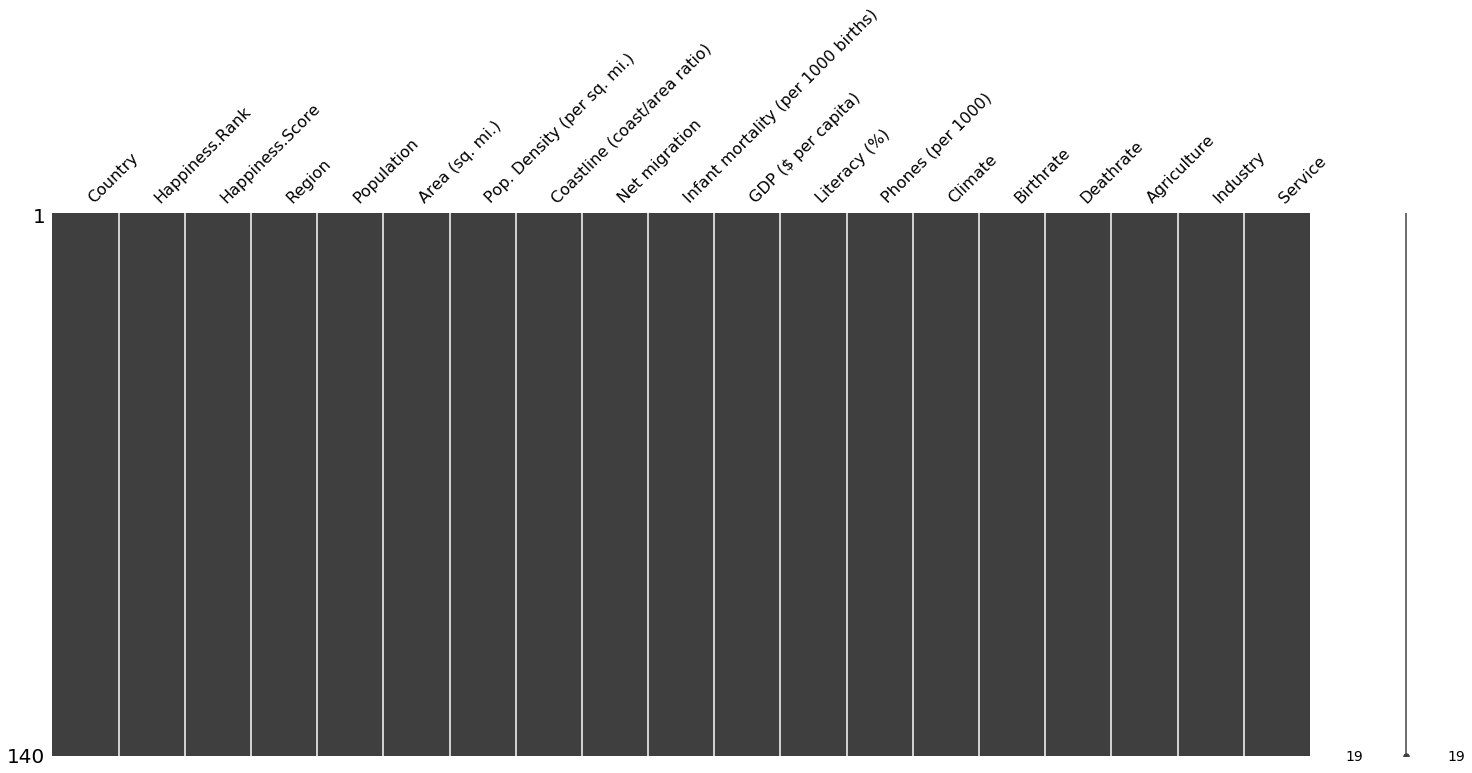

In [29]:
msno.matrix(df_happy)

Our Data is ready to work!

In [30]:
#starting to check for corrlation to finf multilinearty and confounding variable
abs(df_happy.corr())>0.7

,Happiness.Rank,Happiness.Score,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Happiness.Rank,True,True,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False
Happiness.Score,True,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False
Population,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Area (sq. mi.),False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
Pop. Density (per sq. mi.),False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
Coastline (coast/area ratio),False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
Net migration,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
Infant mortality (per 1000 births),True,False,False,False,False,False,False,True,False,True,True,False,True,False,True,False,False
GDP ($ per capita),True,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False
Literacy (%),False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False


In [31]:
df_happy.corr()['Agriculture']

Happiness.Rank                        0.679832
Happiness.Score                      -0.671004
Population                           -0.020894
Area (sq. mi.)                       -0.112560
Pop. Density (per sq. mi.)           -0.124620
Coastline (coast/area ratio)         -0.230949
Net migration                        -0.122551
Infant mortality (per 1000 births)    0.756599
GDP ($ per capita)                   -0.627509
Literacy (%)                         -0.644198
Phones (per 1000)                    -0.653029
Climate                              -0.273807
Birthrate                             0.759205
Deathrate                             0.408831
Agriculture                           1.000000
Industry                             -0.440998
Service                              -0.641271
Name: Agriculture, dtype: float64

In [32]:
df_happy.corr()['Net migration']

Happiness.Rank                       -0.219667
Happiness.Score                       0.225693
Population                           -0.025311
Area (sq. mi.)                        0.065651
Pop. Density (per sq. mi.)            0.247035
Coastline (coast/area ratio)          0.155835
Net migration                         1.000000
Infant mortality (per 1000 births)   -0.026190
GDP ($ per capita)                    0.417745
Literacy (%)                         -0.019952
Phones (per 1000)                     0.286996
Climate                              -0.075146
Birthrate                            -0.057233
Deathrate                             0.017684
Agriculture                          -0.122551
Industry                              0.093766
Service                               0.044929
Name: Net migration, dtype: float64

In [33]:
#I decided to drop Agriculture and Net migration (and happines we rank which we dont need while we use the value)
df_happy = df_happy.drop(columns=['Happiness.Rank','Agriculture','Net migration']) 
df_happy.head(2)

,Country,Happiness.Score,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Climate,Birthrate,Deathrate,Industry,Service
0,Norway,7.537,WESTERN EUROPE,4610820,323802,14.2,7.77,3.70,37800.0,100.0,461.7,3.0,11.46,9.40,0.415,0.564
1,Denmark,7.522,WESTERN EUROPE,5450661,43094,126.5,16.97,4.56,31100.0,100.0,614.6,3.0,11.13,10.36,0.246,0.735


In [34]:
#looking for problematic column names and change them
df_happy.columns

Index(['Country', 'Happiness.Score', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Infant mortality (per 1000 births)', 'GDP ($ per capita)',
       'Literacy (%)', 'Phones (per 1000)', 'Climate', 'Birthrate',
       'Deathrate', 'Industry', 'Service'],
      dtype='object')

In [35]:
df_happy = df_happy.rename(index=str, columns={"Area (sq. mi.)": "Area", "Pop. Density (per sq. mi.)": "Pop_Density"})
df_happy = df_happy.rename(index=str, columns={"Infant mortality (per 1000 births)": "Infant mortality", "GDP ($ per capita)": "GDP"})
df_happy = df_happy.rename(index=str, columns = {'Coastline (coast/area ratio)':'Coastline','Infant mortality': "Infant_mortality"})
df_happy = df_happy.rename(index=str, columns={"Literacy (%)": "Literacy", "Phones (per 1000)": "Phones"})
df_happy = df_happy.rename(index=str, columns={"Happiness.Score":"Happiness_Score"})
df_happy.head(2)

,Country,Happiness_Score,Region,Population,Area,Pop_Density,Coastline,Infant_mortality,GDP,Literacy,Phones,Climate,Birthrate,Deathrate,Industry,Service
0,Norway,7.537,WESTERN EUROPE,4610820,323802,14.2,7.77,3.70,37800.0,100.0,461.7,3.0,11.46,9.40,0.415,0.564
1,Denmark,7.522,WESTERN EUROPE,5450661,43094,126.5,16.97,4.56,31100.0,100.0,614.6,3.0,11.13,10.36,0.246,0.735


In [36]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression
import statsmodels.api as sm
import pylab
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

In [37]:
X = 'Population + Area + Pop_Density + Coastline +Infant_mortality + GDP + Literacy + Phones + Climate + Birthrate + Deathrate + Industry + Service'

In [38]:
# building a linear regression model using statsmodel 
lr_model = ols(formula='Happiness_Score ~'+X, data=df_happy).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness_Score   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     26.86
Date:                Wed, 17 Apr 2019   Prob (F-statistic):           3.26e-30
Time:                        19:20:07   Log-Likelihood:                -123.17
No. Observations:                 140   AIC:                             274.3
Df Residuals:                     126   BIC:                             315.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.8169      0.890      4.288      0.000       2.055       5.579
Population       -6.463e-10   4.08e-10     -1.582      0.116   -1.45e-09    1.62e-10
Area              4.434e-08   2.75e-08      1.613      0.109   -1.01e-08    9.88e-08
Pop_Density      -6.157e-05      0.000     -0.562      0.575      -0.000       0.000
Coastline            0.0014      0.010      0.137      0.891      -0.018       0.021
Infant_mortality     0.0066      0.004      1.670      0.097      -0.001       0.014
GDP               4.323e-05   1.15e-05      3.753      0.000    2.04e-05     6.6e-05
Literacy             0.0097      0.005      2.106      0.037       0.001       0.019
Phones               0.0011      0.001      1.451      0.149      -0.000       0.003
Climate             -0.0001      0.088     -0.001      0.999      -0.173       0.173
Birthrate           -0.0089      0.012     -0.721      0.472      -0.033       0.016
Deathrate           -0.0757      0.015     -4.955      0.000      -0.106      -0.045
Industry             1.0590      0.653      1.622      0.107      -0.233       2.351
Service              0.9984      0.754      1.324      0.188      -0.494       2.491
==============================================================================
Omnibus:                        0.776   Durbin-Watson:                   1.381
Prob(Omnibus):                  0.678   Jarque-Bera (JB):                0.895
Skew:                          -0.156   Prob(JB):                        0.639
Kurtosis:                       2.764   Cond. No.                     3.53e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.53e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
df_var= df_happy.drop(columns=['Country', 'Happiness_Score'])
df_var.head(2)

,Region,Population,Area,Pop_Density,Coastline,Infant_mortality,GDP,Literacy,Phones,Climate,Birthrate,Deathrate,Industry,Service
0,WESTERN EUROPE,4610820,323802,14.2,7.77,3.70,37800.0,100.0,461.7,3.0,11.46,9.40,0.415,0.564
1,WESTERN EUROPE,5450661,43094,126.5,16.97,4.56,31100.0,100.0,614.6,3.0,11.13,10.36,0.246,0.735


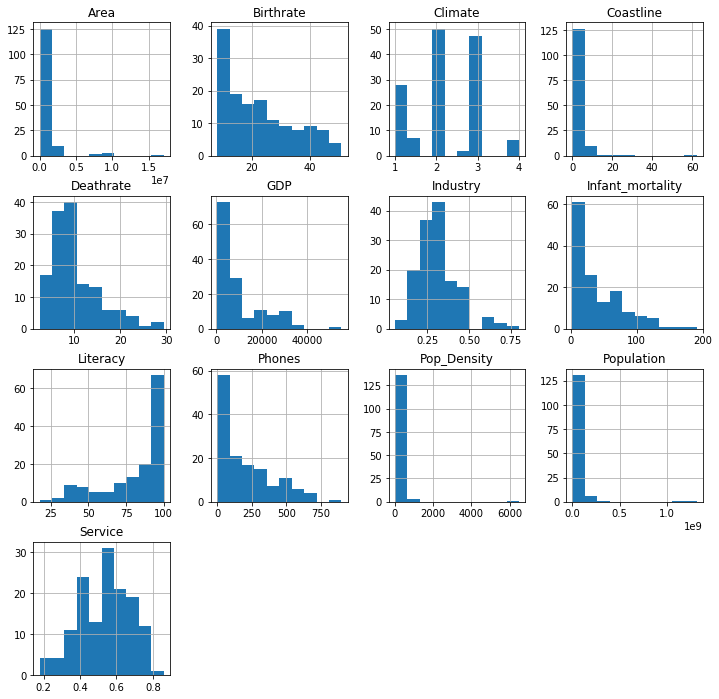

In [40]:
df_var[['Region','Population','Area','Pop_Density','Coastline','Infant_mortality','GDP','Literacy','Phones','Climate','Birthrate','Deathrate','Industry','Service']].hist(figsize  = [12, 12]);
  

C:\Users\homer\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


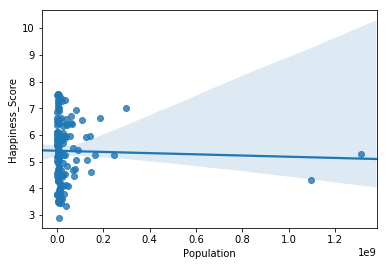

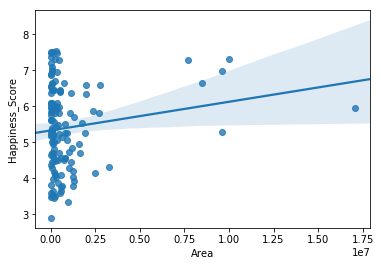

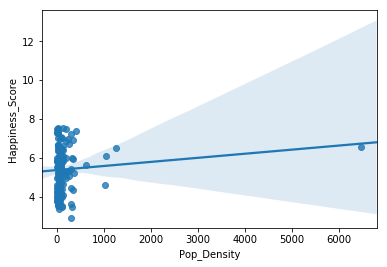

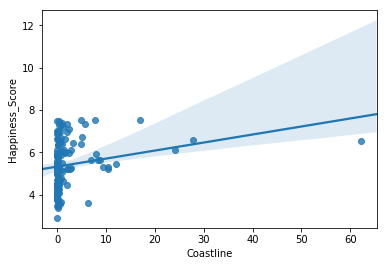

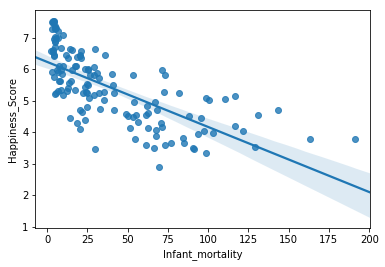

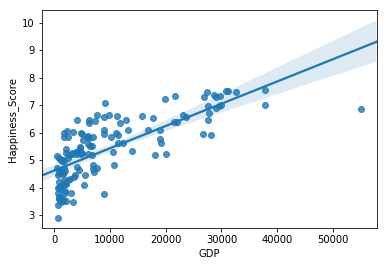

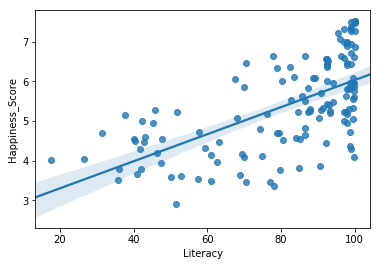

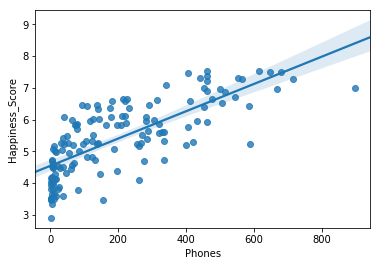

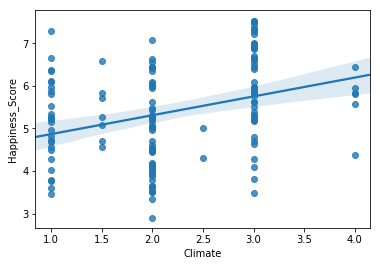

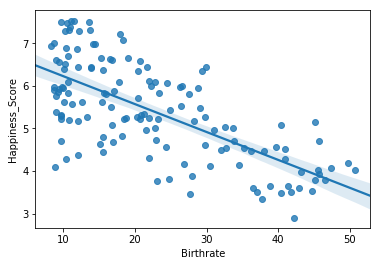

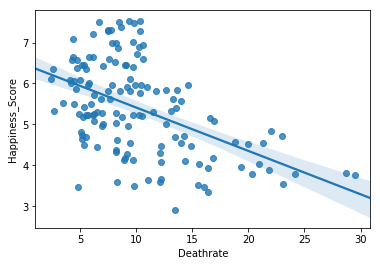

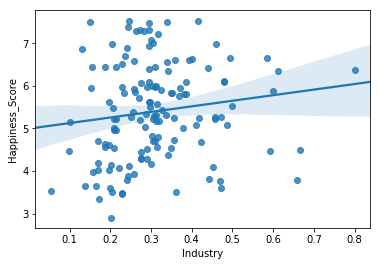

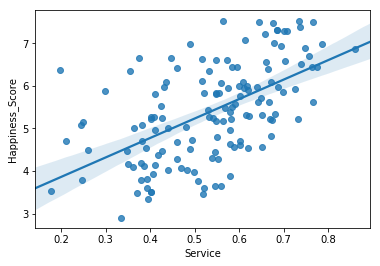

In [41]:
df_var.columns = df_var.columns.str.strip()

for i in df_var.columns:
    if i== "Region":
        pass
    else:
        sns.regplot(x= str(i), y="Happiness_Score", data=df_happy);
        plt.show()



In [42]:
#Climate #Dry tropical or tundra and ice, classification B and E.
# Wet tropical, classification A.
# Temperate humid subtropical and temperate continental, classification Cfa, Cwa, and D.
# Dry hot summers and wet winters,

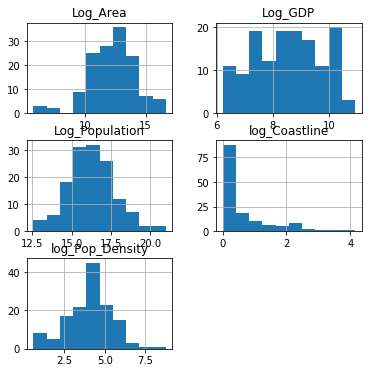

In [43]:
import numpy as np
data_log = pd.DataFrame([])
data_log["Log_Population"] = np.log(df_happy["Population"])
data_log["Log_Area"] = np.log(df_happy["Area"])
data_log["log_Pop_Density"] = np.log(df_happy["Pop_Density"])
data_log["log_Coastline"] = np.log(1+df_happy["Coastline"])
data_log["Log_GDP"] = np.log(df_happy["GDP"])

data_log.hist(figsize  = [6, 6]);

In [44]:
df_happy['Population'] = data_log["Log_Population"]
df_happy['Area'] = data_log["Log_Area"]
df_happy['Pop_Density']=data_log["log_Pop_Density"]
df_happy['Coastline']=data_log["log_Coastline"]
df_happy['GDP']=data_log["Log_GDP"]

In [45]:
lr_model = ols(formula='Happiness_Score ~'+X, data=df_happy).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness_Score   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     27.09
Date:                Wed, 17 Apr 2019   Prob (F-statistic):           2.23e-30
Time:                        19:20:13   Log-Likelihood:                -122.73
No. Observations:                 140   AIC:                             273.5
Df Residuals:                     126   BIC:                             314.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.4001      1.541      0.260      0.796      -2.650       3.450
Population          -0.0555     21.355     -0.003      0.998     -42.317      42.206
Area                 0.0636     21.354      0.003      0.998     -42.196      42.323
Pop_Density         -0.0199     21.351     -0.001      0.999     -42.273      42.234
Coastline           -0.0099      0.083     -0.120      0.905      -0.174       0.154
Infant_mortality     0.0090      0.004      2.241      0.027       0.001       0.017
GDP                  0.4769      0.134      3.561      0.001       0.212       0.742
Literacy             0.0086      0.005      1.833      0.069      -0.001       0.018
Phones               0.0018      0.001      3.047      0.003       0.001       0.003
Climate              0.0510      0.090      0.569      0.570      -0.126       0.228
Birthrate            0.0035      0.012      0.278      0.782      -0.021       0.028
Deathrate           -0.0805      0.016     -5.148      0.000      -0.111      -0.050
Industry             0.1919      0.727      0.264      0.792      -1.247       1.631
Service              0.5285      0.790      0.669      0.505      -1.034       2.092
==============================================================================
Omnibus:                        0.282   Durbin-Watson:                   1.381
Prob(Omnibus):                  0.869   Jarque-Bera (JB):                0.229
Skew:                          -0.098   Prob(JB):                        0.892
Kurtosis:                       2.967   Cond. No.                     2.08e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

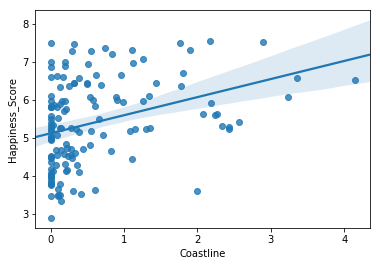

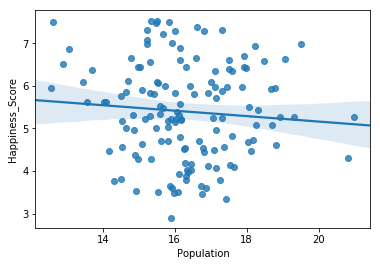

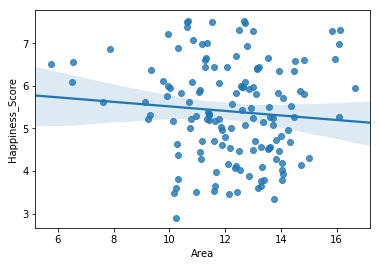

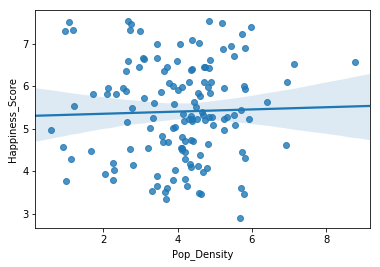

In [46]:
plt.figure()
sns.regplot(x= 'Coastline', y="Happiness_Score", data=df_happy);
plt.figure()
sns.regplot(x= 'Population', y="Happiness_Score", data=df_happy);
plt.figure()
sns.regplot(x= 'Area', y="Happiness_Score", data=df_happy);
plt.figure()
sns.regplot(x= 'Pop_Density', y="Happiness_Score", data=df_happy);


In [47]:
climate_dummies = pd.get_dummies(df_happy["Climate"], prefix="climate")
region_dummies= pd.get_dummies(df_happy["Region"], prefix="region")

In [48]:
region_dummies.columns  = region_dummies.columns.str.strip()
region_dummies.columns

Index(['region_ASIA (EX. NEAR EAST)', 'region_BALTICS',
       'region_C.W. OF IND. STATES', 'region_EASTERN EUROPE',
       'region_LATIN AMER. & CARIB', 'region_NEAR EAST',
       'region_NORTHERN AFRICA', 'region_NORTHERN AMERICA', 'region_OCEANIA',
       'region_SUB-SAHARAN AFRICA', 'region_WESTERN EUROPE'],
      dtype='object')

In [49]:
df_happy= df_happy.drop(["Climate","Region"], axis=1)

In [50]:
df_happy=pd.concat([df_happy,climate_dummies,region_dummies],axis=1)
df_happy.head(3)

,Country,Happiness_Score,Population,Area,Pop_Density,Coastline,Infant_mortality,GDP,Literacy,Phones,...,region_BALTICS,region_C.W. OF IND. STATES,region_EASTERN EUROPE,region_LATIN AMER. & CARIB,region_NEAR EAST,region_NORTHERN AFRICA,region_NORTHERN AMERICA,region_OCEANIA,region_SUB-SAHARAN AFRICA,region_WESTERN EUROPE
0,Norway,7.537,15.343916,12.687887,2.653242,2.171337,3.70,10.540064,100.0,461.7,...,0,0,0,0,0,0,0,0,0,1
1,Denmark,7.522,15.511247,10.671139,4.840242,2.888704,4.56,10.344963,100.0,614.6,...,0,0,0,0,0,0,0,0,0,1
2,Iceland,7.504,12.609496,11.542484,1.064711,1.763017,3.31,10.338511,99.9,647.7,...,0,0,0,0,0,0,0,0,0,1


In [51]:

df_happy = df_happy.rename(index=str, columns={"climate_1.0":"climate_1","climate_1.5":"climate_1_5"})
df_happy = df_happy.rename(index=str, columns={"climate_2.0":"climate_2","climate_2.5":"climate_2_5"})
df_happy = df_happy.rename(index=str, columns={"climate_3.0":"climate_3","climate_4.0":"climate_4"})
df_happy = df_happy.rename(index=str, columns={"region_ASIA (EX. NEAR EAST)":"region_ASIA","region_C.W. OF IND. STATES":"region_IND_STATES"})
df_happy = df_happy.rename(index=str, columns={"region_EASTERN EUROPE":"region_EASTERN_EUROPE","region_LATIN AMER. & CARIB":"region_LATIN_AMER_CARIB"})
df_happy = df_happy.rename(index=str, columns={"region_NEAR EAST":"region_NEAR_EAST","region_NORTHERN AFRICA":"region_NORTHERN_AFRICA"})
df_happy = df_happy.rename(index=str, columns={"region_NORTHERN AMERICA":"region_NORTHERN_AMERICA","region_SUB-SAHARAN AFRICA":"region_SUB_SAHARAN_AFRICA"})      
df_happy = df_happy.rename(index=str, columns={"region_WESTERN EUROPE":"region_WESTERN_EUROPE"})    
      
      

In [52]:
df_happy.columns

Index(['Country', 'Happiness_Score', 'Population', 'Area', 'Pop_Density',
       'Coastline', 'Infant_mortality', 'GDP', 'Literacy', 'Phones',
       'Birthrate', 'Deathrate', 'Industry', 'Service', 'climate_1',
       'climate_1_5', 'climate_2', 'climate_2_5', 'climate_3', 'climate_4',
       'region_ASIA', 'region_BALTICS', 'region_IND_STATES',
       'region_EASTERN_EUROPE', 'region_LATIN_AMER_CARIB', 'region_NEAR_EAST',
       'region_NORTHERN_AFRICA', 'region_NORTHERN_AMERICA', 'region_OCEANIA',
       'region_SUB_SAHARAN_AFRICA', 'region_WESTERN_EUROPE'],
      dtype='object')

In [53]:
d_climate = 'climate_1 + climate_1_5+ climate_2 + climate_3 + climate_4+'
d_region = 'region_ASIA + region_IND_STATES +region_EASTERN_EUROPE + region_LATIN_AMER_CARIB + region_NEAR_EAST + region_NORTHERN_AFRICA + region_NORTHERN_AMERICA + region_OCEANIA +region_SUB_SAHARAN_AFRICA + region_WESTERN_EUROPE'

In [54]:
d_region1= "region_OCEANIA +region_SUB_SAHARAN_AFRICA"

In [55]:
X = 'Infant_mortality + GDP + Literacy + Phones + Deathrate'

In [56]:

lr_model = ols(formula='Happiness_Score ~'+X , data=df_happy).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness_Score   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     70.93
Date:                Wed, 17 Apr 2019   Prob (F-statistic):           5.98e-36
Time:                        19:20:14   Log-Likelihood:                -125.53
No. Observations:                 140   AIC:                             263.1
Df Residuals:                     134   BIC:                             280.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.3881      0.943      0.412      0.681      -1.477       2.253
Infant_mortality     0.0092      0.003      2.731      0.007       0.003       0.016
GDP                  0.4978      0.106      4.692      0.000       0.288       0.708
Literacy             0.0095      0.004      2.373      0.019       0.002       0.017
Phones               0.0018      0.001      3.485      0.001       0.001       0.003
Deathrate           -0.0740      0.014     -5.394      0.000      -0.101      -0.047
==============================================================================
Omnibus:                        0.703   Durbin-Watson:                   1.302
Prob(Omnibus):                  0.704   Jarque-Bera (JB):                0.773
Skew:                          -0.163   Prob(JB):                        0.680
Kurtosis:                       2.840   Cond. No.                     5.37e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

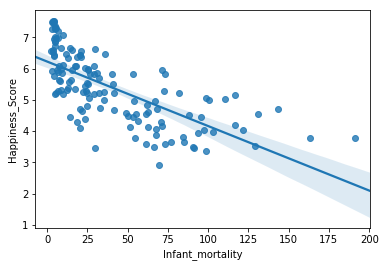

In [57]:
sns.regplot(x= 'Infant_mortality', y="Happiness_Score", data=df_happy);

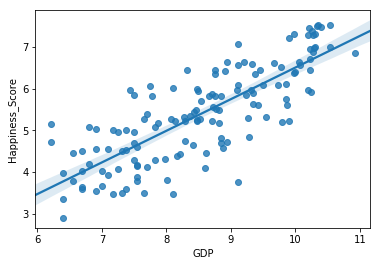

In [58]:
sns.regplot(x= "GDP", y="Happiness_Score", data=df_happy); #log_gdp

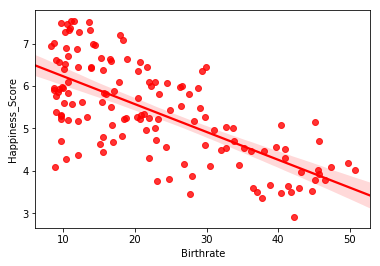

In [59]:
sns.regplot(x= 'Birthrate', y="Happiness_Score", data=df_happy, color="r");

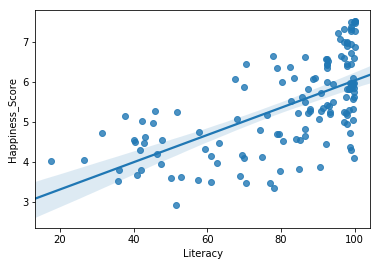

In [60]:
sns.regplot(x= 'Literacy', y="Happiness_Score", data=df_happy);